# Cluster Analysis

It is used to group a set of object in clusters belonging to the same group.

It is an unsupervised technique used to assess if data is divided in specific groups. It can also be used to reduce the number of dimensions to the number of groups found in data.

It is important to assess clustering tendencies before and after clustering in order to avoid mistakenly-created clusters. 

Before applying cluster analysis:

* Use scatter plots to see if objects are grouped

* Icon plots

* Ordered dissimilarity matrix

* Statistical tests

The two most popular clustering methods families are:

* **Hierarchical:** Algorithms which recursively find nested clusters. It makes n-1 steps producing n-1 partitions of data.

* **Partitional:** Find all the cluster as a partition of data, without hierarchy.

Hierarchical algorithms find nested cluster:

* in a **bottom-up way (agglomerative)** starting from indipendent points, merging them into clusters.

* in a **top-down way (divisive)** starting froma single cluster, splitting it into smaller ones.

In order to split values into clusters, we use the notion of **degree of proximity** based on distance, which we consider as the Euclidean distance between two observation in a p-dimensional space.

$$d(x_i, x_j) = \sqrt{\Sigma_{h=1}^{p}(x_{ih}-x_{jh})^2}$$

The distance matrix is symmetric, has 0s on the diagonal, and for each position has the distance between the two correspondent elements in the dataset.

### Hierarchical Agglomerative Procedure

* Each unit constitutes a group. The distance matrix $D$ contains the distances between all groups.

* The two groups which have minimum distance are merged. We decrease the dimension of $D$ by one unit, computing the new distance with the new group.

* Iterate until a group of all elements is created.

### Distances between groups

* **Single linkage (nearest neighbour):** Minimum distance between units belonging to the two respective groups.

* **Complete linkage (furthest neighbour):** Maximal distance between units belonging to the two groups (equivalent to the diameter of the smallest circle containing all the units of the two groups).

* **Average linkage**: Arithmetic mean of distance between all units of the two groups.

* **Centroid**: Distance between groups is given by the distance between centroids of the two groups. In the bottom-up approach, the increase in distance could be non-increasing with this distance.

* **Ward**: It is based on the decomposition of total deviance (sum of squared residuals of all units) into deviance within groups $D_W$ and deviance between groups $D_B$. The method merges iteratively the two groups which minimize the increase in withing deviance, maximising the increase in between deviance.

$$D_W - \Sigma_{g=1}^k\Sigma_{i\in g}((x_{ig}-\bar{x_g})^2$$

The **dendrogram** is the graphical representation of a hierarchical bottom-up method. It is a tree showing the agglomerative process of the algorithm. An heuristic approach to decide the stopping for our tree is to compute a measure of separation between groups as the ratio $\frac{D_{i+1}}{D_i}$, where D_g is the distance at which groups were merged at iteration $i$ (Ex. at first iteration, the minimum value inside the distance matrix is 2 and at the second iteration it is 3, so the mesure of separation for 2nd iteration is $3/2 = 1.5$).

The complete linkage method can produce biased results, but it is more prone to for spherical, well-balanced groups.

## Partitional methods

Partitional methods split a set of observations in k groups, optimizing the size of those through an objective function. The most popular method in this category is the **k-means**, based on the centroids of the groups.

Steps of k-means algorithm:

1. Specify k initial centroids, which represent the center of our k groups. They could be obtained through a previous hierarchical analysis.


2. Observations are assigned to groups based on their distance.


3. Calculate the new centroid based on all the units that were assigned to the group, validating that observation are still assigned to the closes group.

4. Move units to the group that has the nearest centroid.

5. Repeat 3 and 4 until you reach a stable configuration or minimize deviance.


## Clustering Validation

Ways to validate results after applying a clustering algorithm:

* External: Comparing results to an external known result.

* Internal: Use internal information of the clustering process to evaluate the goodness of clustering.

* Clustering stability: Validating internal consistency by removing one column at a time.

* Relative clustering: Validates the clustering approach by tryign different parameters for the same algorithm.


# Laboratory: Cluster Analysis on Demographic Data in EU

In [29]:
library(dplyr)
library(TeachingDemos)
library(KernSmooth)
library(MASS)
library(lattice)
library(ggplot2)
library(RColorBrewer)
library(viridis)
library(factoextra)
library(NbClust)

In [30]:
x <- read.table("EUdemo.txt", header=TRUE, row.names=1)
n <- nrow(x)
p <- ncol(x)
ind_EU <- which(rownames(x) == "UE")
x  <- x[-ind_EU,]

In [31]:
x %>% str
x %>% summary

'data.frame':	40 obs. of  13 variables:
 $ NAT : num  9.65 11.17 12.44 11.15 12.59 ...
 $ MOR : num  9.66 10.27 11.12 9.54 9.16 ...
 $ CR.N: num  -0.0124 0.8996 1.3152 1.6068 3.4264 ...
 $ MIG : num  2.447 1.574 1.766 0.658 0.846 ...
 $ CR.T: num  2.43 2.47 3.08 2.27 4.27 ...
 $ M.IN: num  4.3 5.3 4.2 3.6 4.8 4.7 5.9 5.5 5.2 2.9 ...
 $ VEC : num  92 95 80.6 81.4 84.3 ...
 $ N.FI: num  1.32 1.61 1.73 1.74 1.77 1.36 1.3 1.88 1.22 1.73 ...
 $ E.P : num  28.1 28.5 29.6 29.6 29.3 28.6 28.7 30.5 30 29.4 ...
 $ NU  : num  4.9 4.3 6.7 4.7 4.8 5.2 5.9 4.9 4.8 4.8 ...
 $ E.M : num  27 26.1 29.7 27.7 27.6 26.9 26.5 28.2 27.6 27.4 ...
 $ V.M : num  75.1 74.8 74.2 73.8 74.9 74.5 75.4 73.9 76 74.7 ...
 $ V.F : num  81 81.1 79 81 82.4 80.5 80.4 79 82.1 81.2 ...


      NAT               MOR              CR.N              MIG          
 Min.   : 0.2254   Min.   : 5.127   Min.   :-6.3696   Min.   :-10.9020  
 1st Qu.: 9.4017   1st Qu.: 8.778   1st Qu.:-1.1754   1st Qu.: -0.1701  
 Median :10.4273   Median : 9.889   Median : 0.4460   Median :  0.9284  
 Mean   :10.8896   Mean   :10.063   Mean   : 0.8267   Mean   :  1.1903  
 3rd Qu.:12.4762   3rd Qu.:10.890   3rd Qu.: 3.5132   3rd Qu.:  2.4504  
 Max.   :21.0929   Max.   :14.693   Max.   :14.8413   Max.   : 11.3208  
      CR.T              M.IN             VEC              N.FI      
 Min.   :-15.754   Min.   : 2.400   Min.   : 17.00   Min.   :1.100  
 1st Qu.: -1.207   1st Qu.: 4.600   1st Qu.: 60.65   1st Qu.:1.290  
 Median :  1.826   Median : 5.850   Median : 78.45   Median :1.430  
 Mean   :  2.017   Mean   : 8.955   Mean   : 74.00   Mean   :1.509  
 3rd Qu.:  4.838   3rd Qu.:11.125   3rd Qu.: 88.60   3rd Qu.:1.732  
 Max.   : 15.487   Max.   :37.900   Max.   :124.50   Max.   :2.600  
      

In [32]:
x %>% var %>% diag %>% sqrt

NAT        MOR       CR.N        MIG       CR.T       M.IN        VEC 
 2.9578658  2.1624788  4.1705540  3.6036389  6.3627741  7.3494793 24.7585519 
      N.FI        E.P         NU        E.M        V.M        V.F 
 0.3060433  1.7561905  1.5664737  2.3358947  4.6820333  3.2786714

In [33]:
# We standardize the dataset (0 as mean, 1 as variance) since we see that
# VEC variable could add noise to our analysis.
x <- scale(x)

In [34]:
x

,NAT,MOR,CR.N,MIG,CR.T,M.IN,VEC,N.FI,E.P,NU,E.M,V.M,V.F
Austria,-0.41889459,-0.18494502,-0.201194855,0.34864114,0.06558189,-0.63337820,0.72712249,-0.61674280,0.04555314,-0.49314586,0.57900728,0.75608176,0.83646688
Belgio,0.09380886,0.09460592,0.017477452,0.10658430,0.07182119,-0.49731414,0.84829275,0.33083554,0.27331887,-0.87617177,0.19371593,0.69200704,0.86696704
Danimarca,0.52346900,0.49012840,0.117120861,0.15980042,0.16727325,-0.64698461,0.26667553,0.72293692,0.89967460,0.65593187,1.73488132,0.56385759,0.22646369
Finlandia,0.08836304,-0.23987597,0.187047746,-0.14763911,0.03898530,-0.72862305,0.29898760,0.75561204,0.89967460,-0.62082116,0.87867832,0.47842462,0.83646688
Francia,0.57507513,-0.41558589,0.623344176,-0.09552178,0.35447818,-0.56534617,0.41611884,0.85363738,0.72885031,-0.55698351,0.83586817,0.71336528,1.26346911
Germania,-0.50791452,0.11339732,-0.419024118,0.35280092,-0.07484088,-0.57895258,1.07851623,-0.48604234,0.33026030,-0.30163290,0.53619713,0.62793231,0.68396608
Grecia,-0.40787516,-0.13168624,-0.220994781,0.32830081,0.04108379,-0.41567571,1.59954832,-0.68209303,0.38720173,0.14523066,0.36495653,0.82015649,0.65346592
Irlanda,1.11625655,-0.75035680,1.180746650,1.14740676,1.42378263,-0.47010133,-0.91675394,1.21306365,1.41214747,-0.49314586,1.09272907,0.49978286,0.22646369
Italia,-0.53104674,-0.06971430,-0.340484586,0.15782440,-0.13378869,-0.51092055,2.03980024,-0.94349395,1.12744032,-0.55698351,0.83586817,0.94830594,1.17196863
Lussemburgo,0.69638962,-0.58995569,0.799796292,2.68563283,2.04527841,-0.82386789,0.05664709,0.72293692,0.78579174,-0.55698351,0.75024787,0.67064880,0.89746720


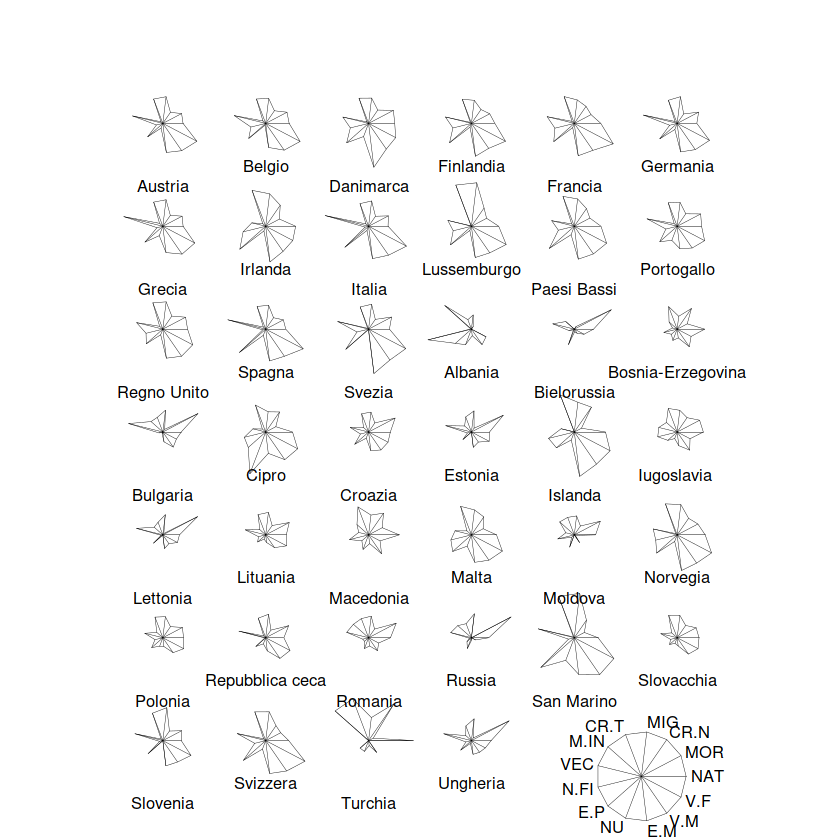

In [35]:
# Similar stars probably belong to the same group
stars(x, scale=TRUE, key.loc=c(13,1.5), draw.segments=FALSE, )

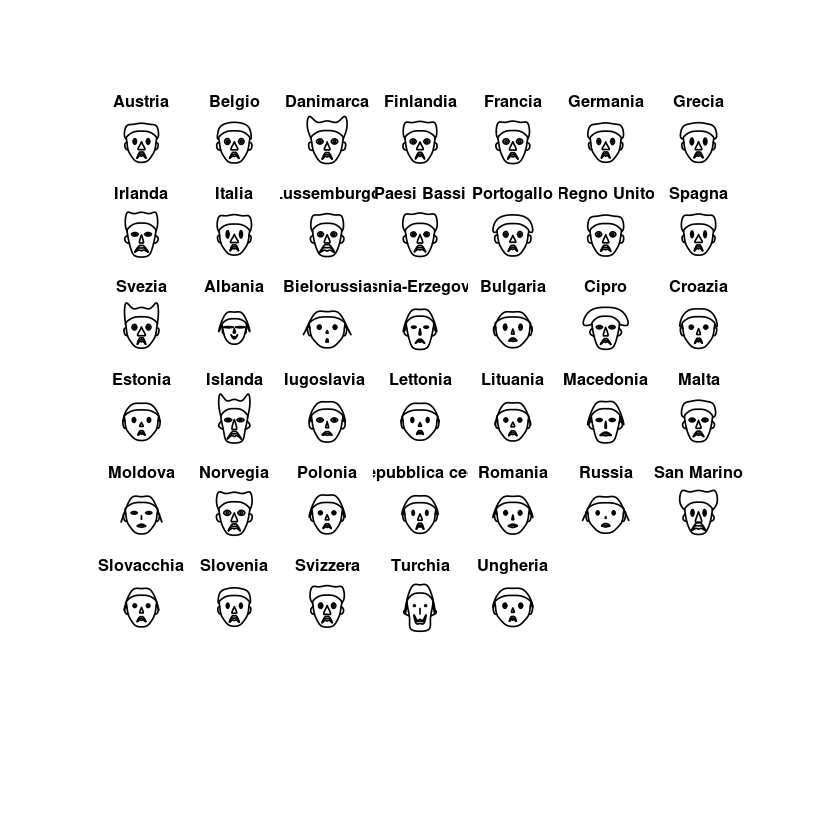

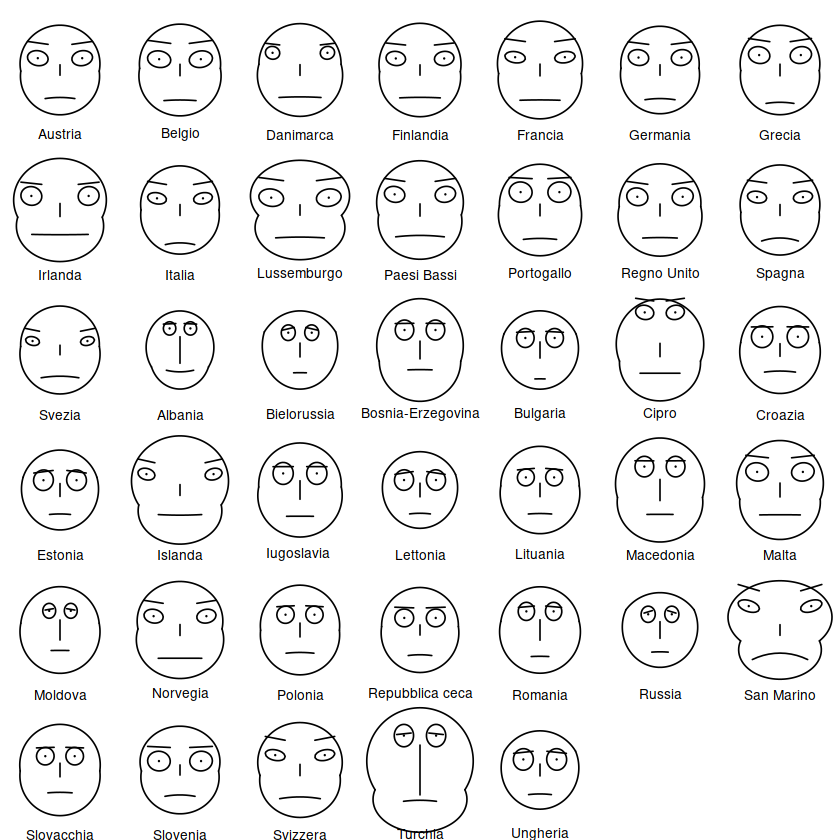

In [36]:
# Similar faces are likely to belong to the same group
faces(x)
faces2(x)

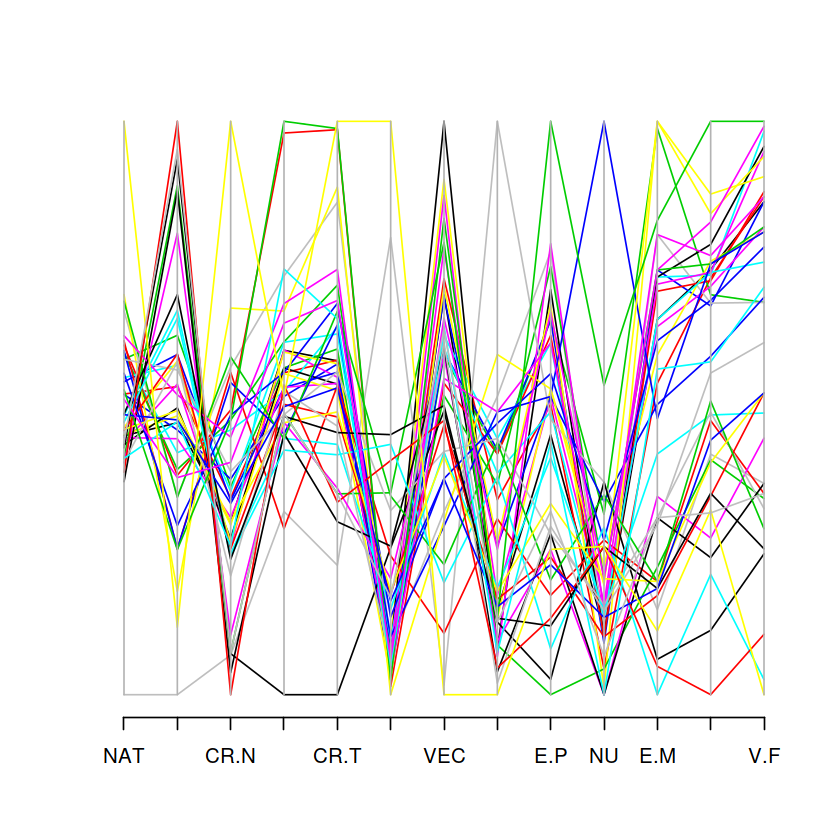

In [37]:
parcoord(x, col=1:n)

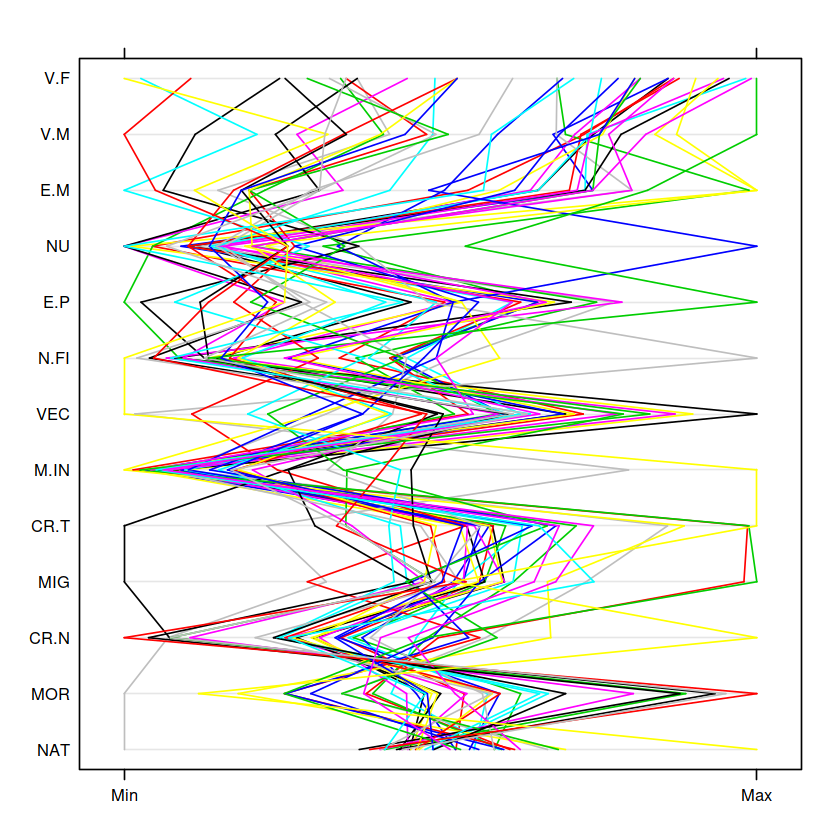

In [38]:
# This can allow to visualize groups as "lines that go together"
# This also allows to visualize correlation between features.
parallelplot(x, col=1:n)

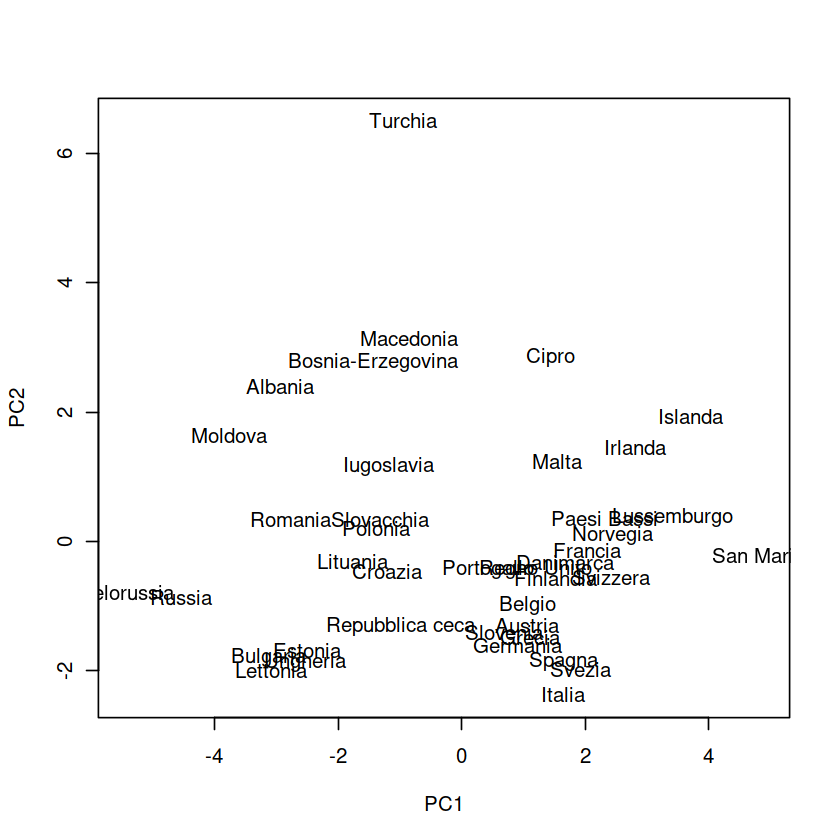

In [39]:
pcdemo <- prcomp(x)
pc <- pcdemo$x[,1:2]
plot(pc,pch="")
text(pc, labels=rownames(pc))

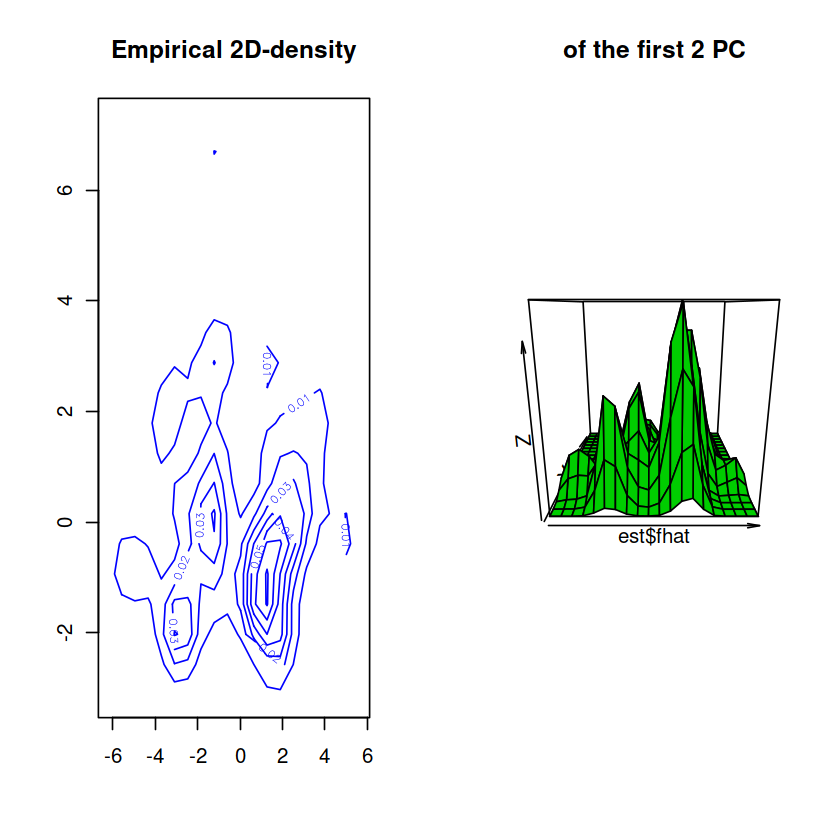

In [40]:
par(mfrow=c(1,2))
est <- bkde2D(pc, bandwidth = c(0.5, 0.5), gridsize=c(20,20))
contour(est$x1, est$x2, est$fhat, main="Empirical 2D-density", col = 4)
persp(est$fhat, main = "of the first 2 PC", col="green3")

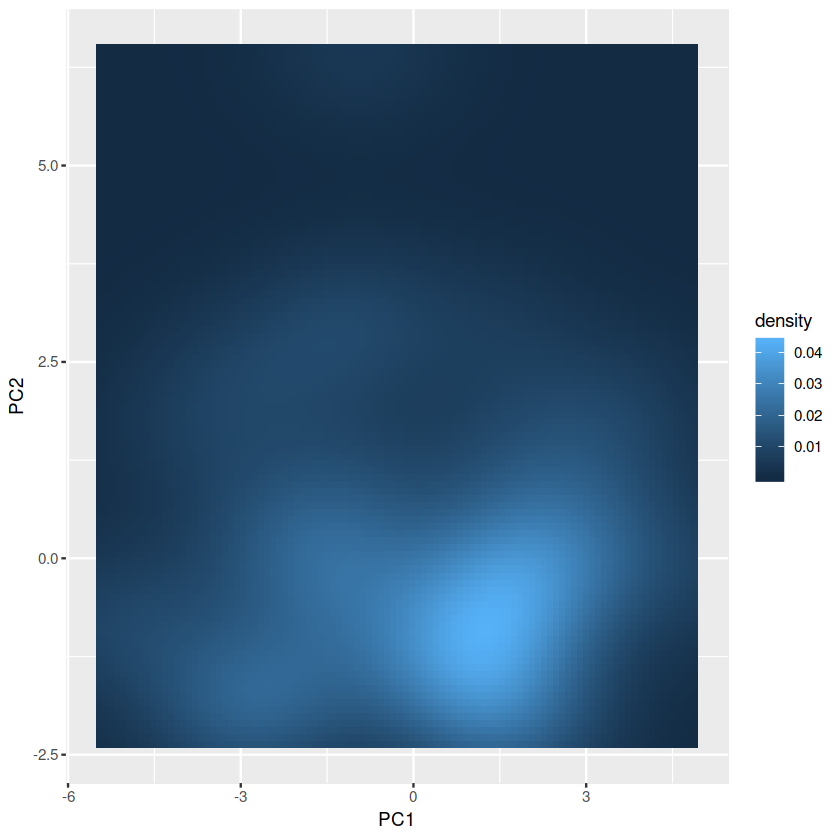

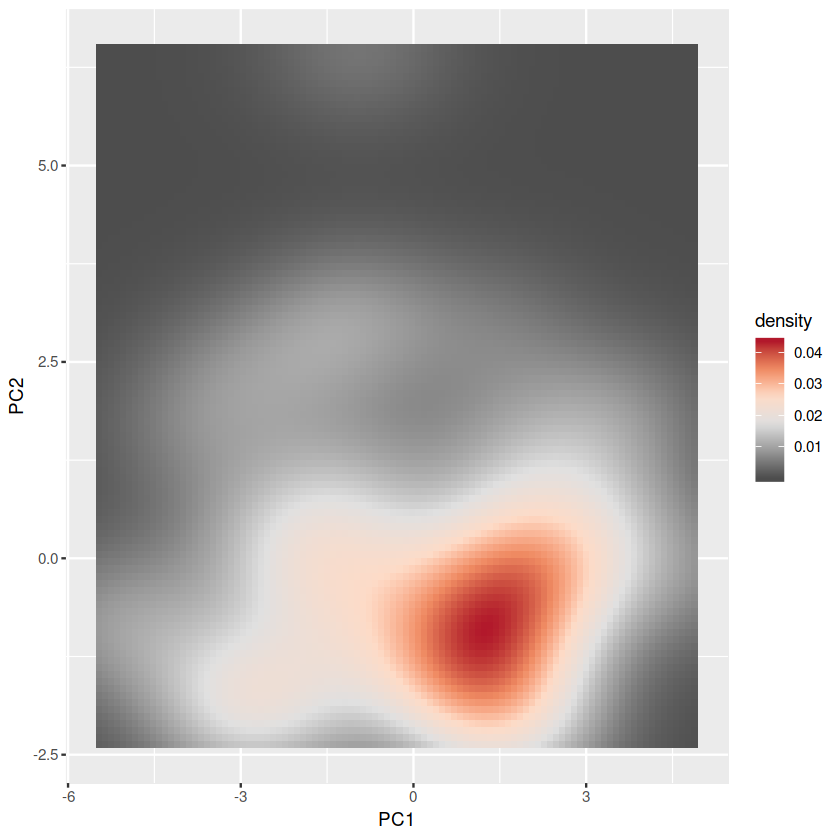

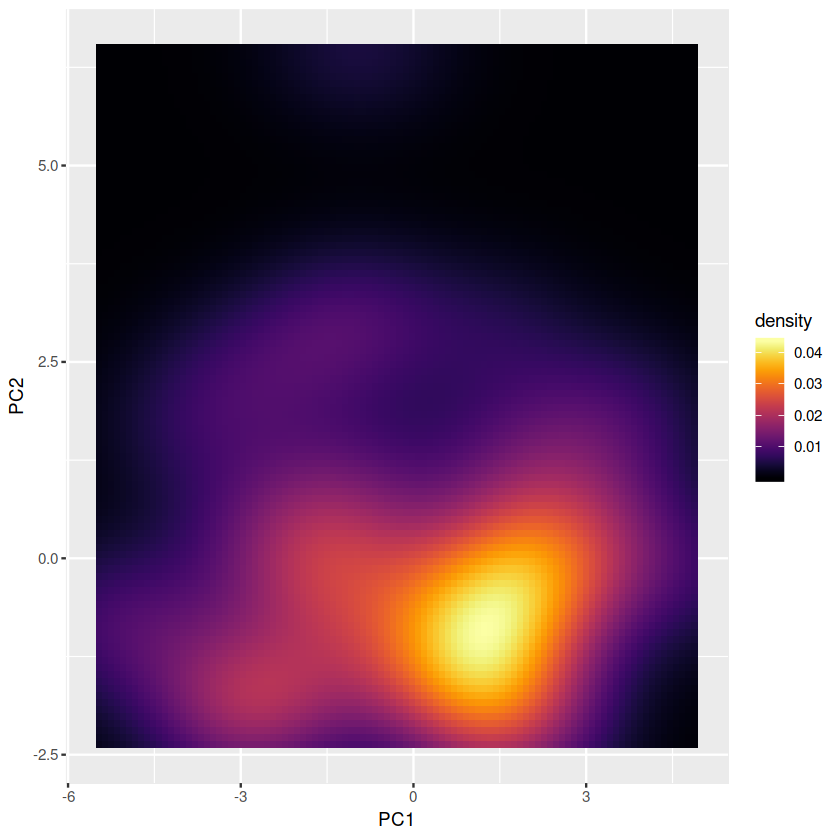

In [41]:
pc <- pc %>% as.data.frame
p1 <- ggplot(pc, aes(x = PC1, y = PC2)) + stat_density2d(aes(fill = ..density..), 
    geom = "tile", contour = F)
p2 <- p1 + scale_fill_distiller(palette = "RdGy")
p3 <- p1 + scale_fill_viridis(option = "inferno")
p1
p2
p3

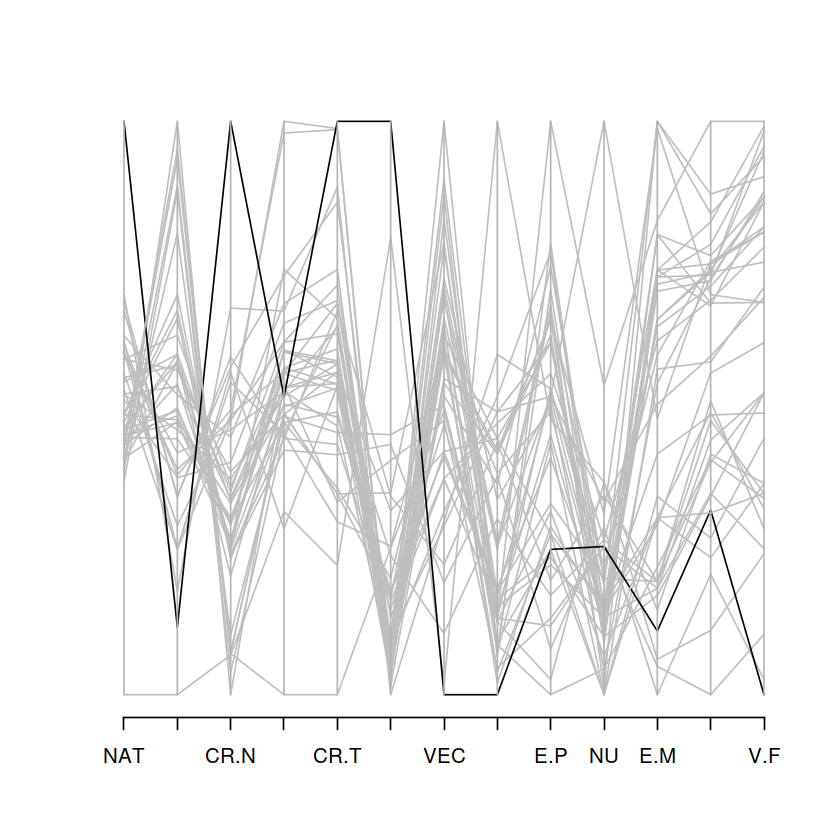

In [42]:
parcoord(x, col=ifelse(rownames(x) == "Turchia", "black", "grey"))

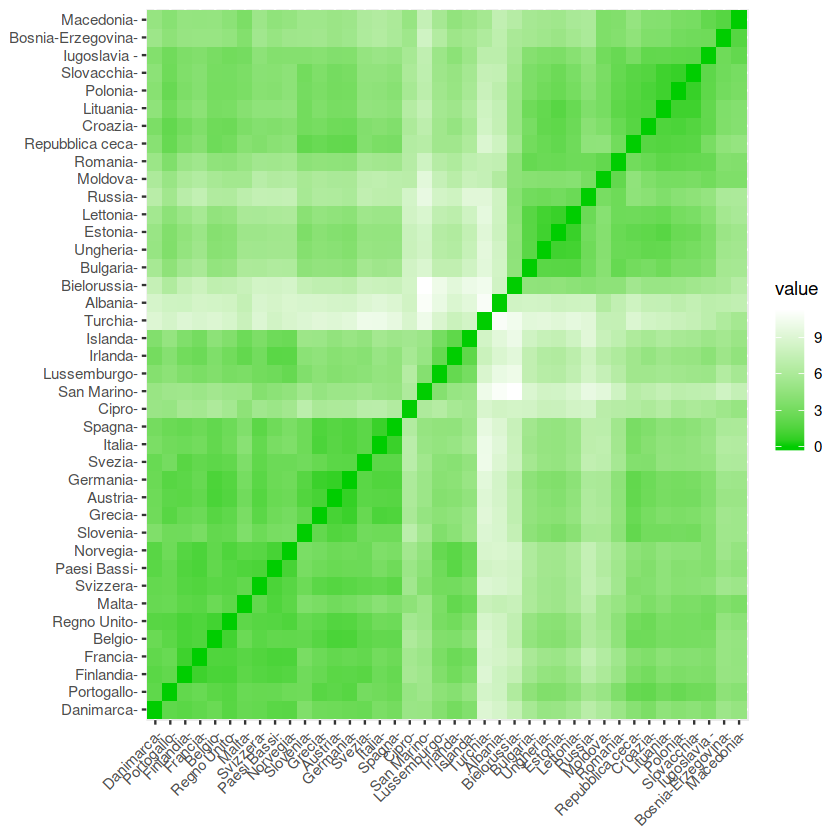

In [43]:
# A visualization for distance matrix
# We see Turchia and Bielorussia are distant from all other entries.
fviz_dist(dist(x), gradient= list(low = "green3", mid=NULL, high="white"))

## Hierarchical methods

In [44]:
# Numerical visualization of the distance matrix
d <- dist(x)
d %>% as.matrix

,Austria,Belgio,Danimarca,Finlandia,Francia,Germania,Grecia,Irlanda,Italia,Lussemburgo,⋯,Polonia,Repubblica ceca,Romania,Russia,San Marino,Slovacchia,Slovenia,Svizzera,Turchia,Ungheria
Austria,0.0000000,1.315535,2.700563,1.909584,2.232991,0.6832915,1.1936568,3.964258,1.8320335,3.829300,⋯,3.0430707,2.228314,4.380383,6.164579,5.068864,3.0632404,1.571372,1.687669,9.081010,4.042413
Belgio,1.3155354,0.000000,2.533547,1.309691,1.524426,1.3602473,1.7760917,3.552067,2.2442713,3.681370,⋯,3.0968037,2.732402,4.431617,6.282757,5.436473,3.1290524,2.231442,1.877118,8.925139,4.034103
Danimarca,2.7005630,2.533547,0.000000,1.894585,2.152176,2.5701680,2.8044634,3.040916,3.3223477,3.815750,⋯,3.9881424,4.007539,5.022011,6.736989,4.896529,4.2092432,3.571389,2.289947,8.974284,4.810914
Finlandia,1.9095840,1.309691,1.894585,0.000000,0.939667,1.9677034,2.4022933,2.889780,2.6776841,3.614337,⋯,3.4341100,3.436730,4.968317,6.779781,5.296558,3.5746352,2.818373,1.706419,8.993940,4.605186
Francia,2.2329913,1.524426,2.152176,0.939667,0.000000,2.4114788,2.6521707,2.641341,2.9438267,3.321050,⋯,3.8473649,3.919857,5.320033,7.311941,5.070307,3.8981508,3.218203,1.574340,8.704877,5.213649
Germania,0.6832915,1.360247,2.570168,1.967703,2.411479,0.0000000,0.8544185,4.176490,1.5332873,4.037246,⋯,3.0906176,2.212306,4.298303,5.938044,5.063215,3.2383238,1.750874,1.884502,9.334748,3.764493
Grecia,1.1936568,1.776092,2.804463,2.402293,2.652171,0.8544185,0.0000000,4.410490,1.3828373,4.177179,⋯,3.3608603,2.508243,4.439717,6.191855,4.699384,3.5384117,2.225431,1.924053,9.233293,4.172405
Irlanda,3.9642580,3.552067,3.040916,2.889780,2.641341,4.1764900,4.4104898,0.000000,4.8514133,2.324984,⋯,4.8263406,5.337557,6.153333,8.058950,4.804404,4.7764075,4.150056,2.965131,7.794925,6.407068
Italia,1.8320335,2.244271,3.322348,2.677684,2.943827,1.5332873,1.3828373,4.851413,0.0000000,4.615188,⋯,4.3179266,3.341450,5.436062,6.970184,4.904062,4.5046180,2.720638,2.271824,10.033384,4.729011
Lussemburgo,3.8293004,3.681370,3.815750,3.614337,3.321050,4.0372462,4.1771794,2.324984,4.6151884,0.000000,⋯,5.3475694,5.344759,6.555458,8.272560,3.844399,5.2026784,3.650686,2.946160,8.716453,6.643200


In [45]:
# Single linkage (nearest-neighbours) method
nn <- hclust(d, method="single")
names(nn)

[1] "merge"       "height"      "order"       "labels"      "method"     
[6] "call"        "dist.method"

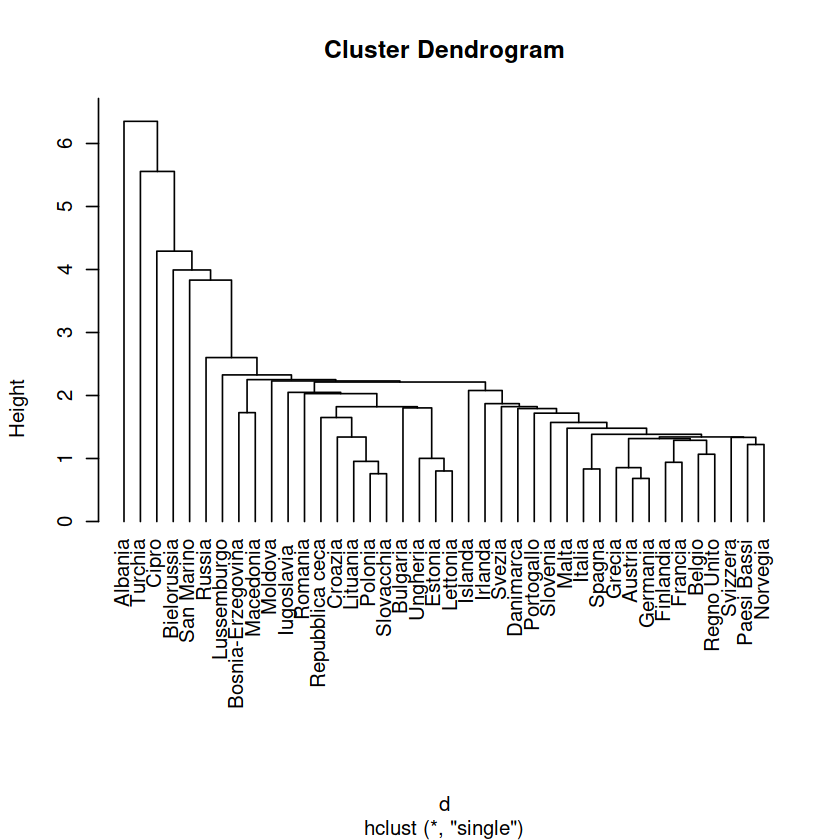

In [46]:
# Similar countries are aumatically put close to each other.
nn  %>% plot(hang=-1)

In [47]:
m <- length(nn$height)
m

[1] 39

In [48]:
# We compute the relative separation mesure 
s <- rep(NA, length(m) - 1)
for (j in m:2) s[j]  <- nn$height[j]/nn$height[j - 1]
s <- s[-1]
length(s)

[1] 38

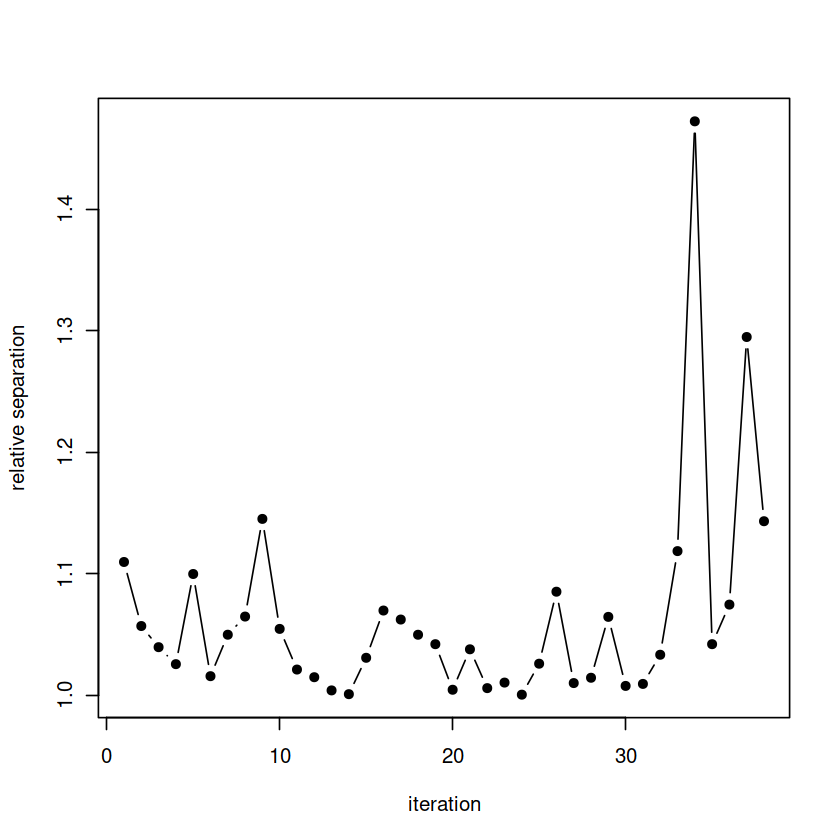

In [49]:
plot(s, type="b", pch=16,
    xlab="iteration", ylab="relative separation")

In [50]:

s

[1] 1.109666 1.056954 1.039552 1.025581 1.099774 1.015681 1.049803 1.064748
 [9] 1.145121 1.054585 1.021137 1.014829 1.003969 1.000874 1.030804 1.069707
[17] 1.062290 1.049771 1.042011 1.004512 1.037797 1.005844 1.010405 1.000464
[25] 1.025950 1.085204 1.010011 1.014381 1.064486 1.007666 1.009315 1.033313
[33] 1.118621 1.472332 1.042020 1.074592 1.294829 1.143212

In [64]:
# We find the maximum separation
max(s)

[1] 1.472332

In [95]:
b <- (2:m)[s == max(s)]
b

[1] 35

In [96]:
nn$height[b]/nn$height[b-1]

[1] 1.472332

In [97]:
k <- (m:2)[s == max(s)]
k

[1] 6

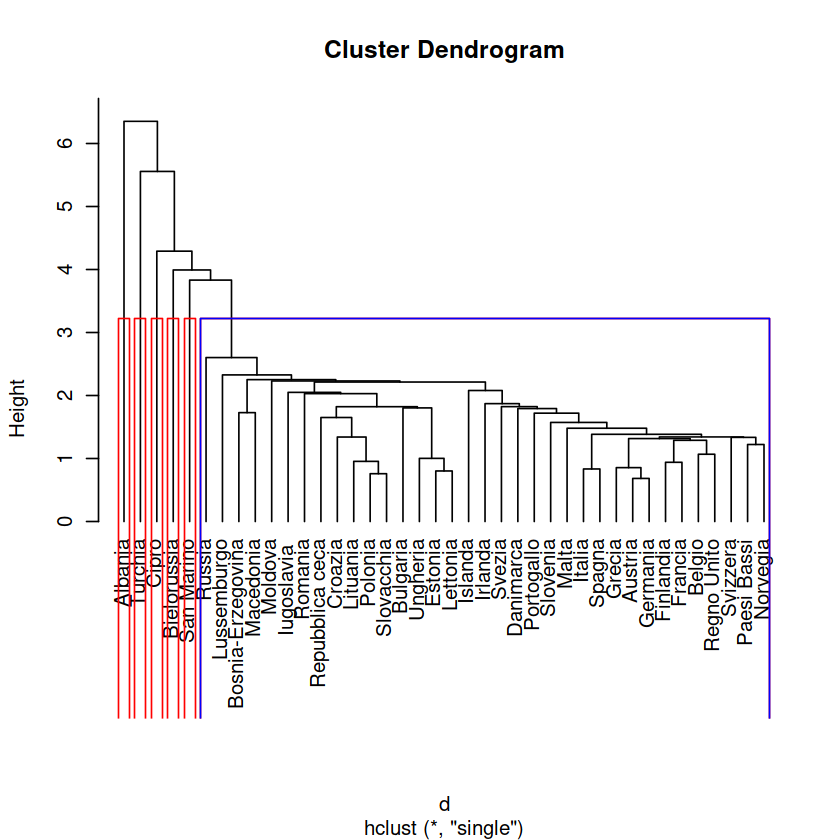

In [103]:
nn  %>% plot(hang=-1)
rect.hclust(nn, k = k)
rect.hclust(nn, k = k, which = k, border = 4)

In [113]:
k2 <- (2:m)[s == max(s[-(k - 1)])]

In [114]:
k2

[1] 35

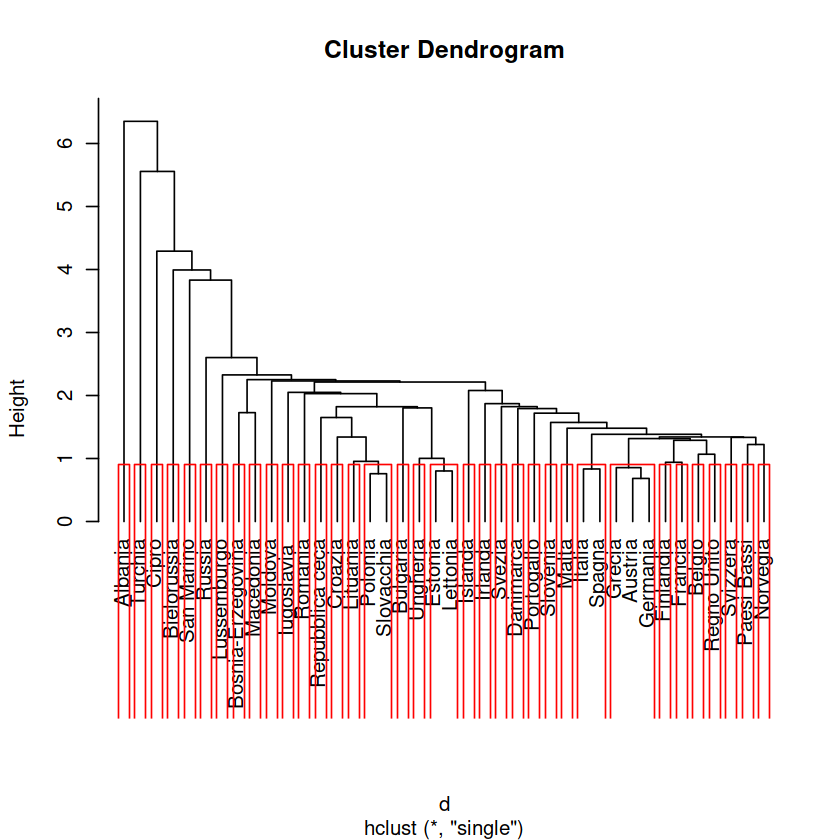

In [115]:
nn  %>% plot(hang=-1)
rect.hclust(nn, k = k2)

In [74]:
# TODO: furthest neighbour, average linkage, centrod, ward

In [91]:
lm <- hclust(d, method="ave")

## Partitional Methods

In [77]:
kmeans(x, 6, iter.max=10, nstart=1)

K-means clustering with 6 clusters of sizes 6, 10, 1, 1, 14, 8

Cluster means:
         NAT        MOR       CR.N        MIG       CR.T       M.IN        VEC
1  0.2920390 -0.2219781  0.3222198 -0.6557145 -0.1601696  0.4687407 -1.0385974
2 -0.5792802  1.2555351 -1.0618497 -0.6300020 -1.0528114  0.3095457  0.1333883
3  3.4495426 -1.7624610  3.3603616 -0.1510413  2.1170437  3.9383742 -2.3021338
4 -3.6053965 -2.2824675 -1.3735563 -1.3856389 -1.6850878  2.9587130 -2.2294317
5 -0.1049829 -0.0388889 -0.0542923  0.2505196  0.1062985 -0.5721494  0.8289632
6  0.7082728 -0.8292636  0.9323081  1.0329641  1.1961246 -0.5993622 -0.2720272
        N.FI        E.P         NU        E.M        V.M        V.F
1  0.2219185 -0.9699024  0.1984287 -1.0620485 -0.6357637 -0.9681259
2 -0.8323986 -1.0021692 -0.3399355 -0.8679758 -1.1341226 -0.8501920
3 -1.3355953 -0.8085683  0.3367436 -1.3046393 -1.0807270 -2.1525488
4  3.5656719  0.1594360  0.9751201 -1.1762089 -0.6535622 -0.8715421
5 -0.1196143  0.6190347 -0.3

In [92]:
# Cut the tree found with single linkage at cluster number = 6
lm_cl6 <- cutree(lm, k=6)
lm_cl6

Austria            Belgio         Danimarca         Finlandia 
                1                 1                 1                 1 
          Francia          Germania            Grecia           Irlanda 
                1                 1                 1                 1 
           Italia       Lussemburgo       Paesi Bassi        Portogallo 
                1                 1                 1                 1 
      Regno Unito            Spagna            Svezia           Albania 
                1                 1                 1                 2 
      Bielorussia Bosnia-Erzegovina          Bulgaria             Cipro 
                3                 1                 1                 4 
          Croazia           Estonia           Islanda       Iugoslavia  
                1                 1                 1                 1 
         Lettonia          Lituania         Macedonia             Malta 
                1                 1                 1                 1 
          Moldova          Norvegia           Polonia   Repubblica ceca 
                1                 1                 1                 1 
          Romania            Russia        San Marino        Slovacchia 
                1                 1                 5                 1 
         Slovenia          Svizzera           Turchia          Ungheria 
                1                 1                 6                 1

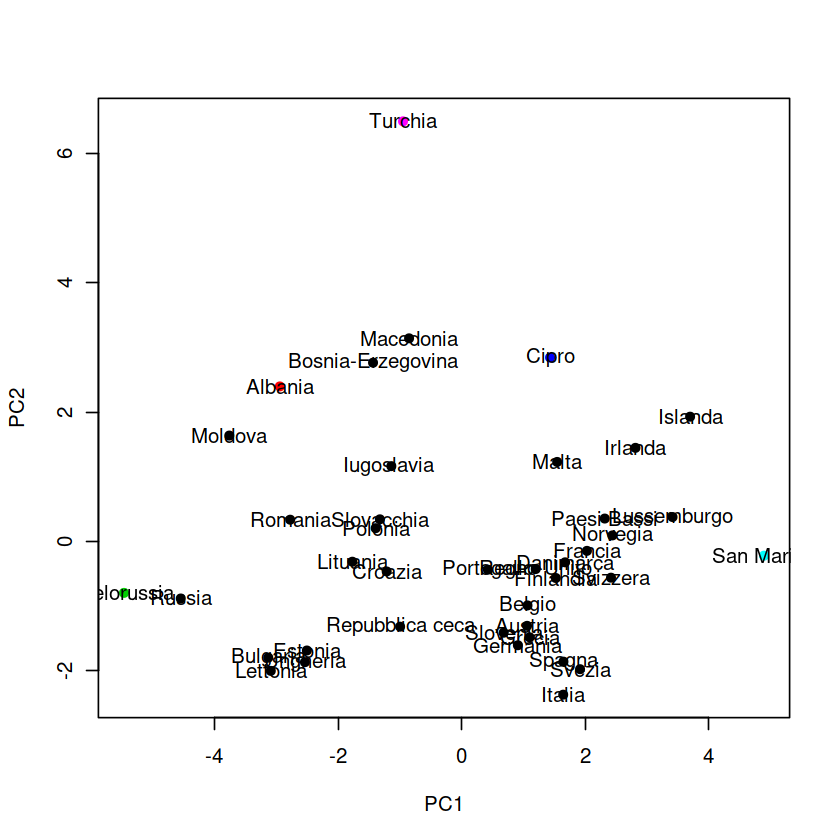

In [93]:
plot(pc, col = rainbow6lm_cl6, pch=16)
text(pc, labels=rownames(pc))

In [116]:
init6 <- aggregate(x, list(lm_cl6), mean)

In [117]:
km6 <- kmeans(x, init6[, -1], 100)

In [118]:
# totss is the total sum of sqaures
# withinss is the withing sum of square
# tot.withinss is what we are minimizing, withinss split by class
names(km6)

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"

In [119]:
km6$iter
km6$ifault
km6$size
km6$centers
km6$tot.w

[1] 3

[1] 0

[1] 14  1 14  3  7  1

,NAT,MOR,CR.N,MIG,CR.T,M.IN,VEC,N.FI,E.P,NU,E.M,V.M,V.F
1,-0.1049829,-0.0388889,-0.0542923,0.2505196,0.1062985,-0.5721494,0.8289632,-0.1196143,0.6190347,-0.3335517,0.7380164,0.67980233,0.7950738
2,-3.6053965,-2.2824675,-1.3735563,-1.3856389,-1.6850878,2.9587130,-2.2294317,3.5656719,0.1594360,0.9751201,-1.1762089,-0.65356220,-0.8715421
3,-0.4303623,0.9388805,-0.7920443,-0.5755429,-0.8451207,0.3462830,-0.1245313,-0.5700641,-0.9753254,-0.2469149,-0.9315794,-1.03648497,-0.8737206
4,0.8707537,-1.0248244,1.1489442,-0.9093561,0.2380633,0.2192899,-1.3933569,0.6902618,-0.6187635,1.9326849,-0.6767571,0.05125978,-0.4750400
5,0.7197752,-0.7829259,0.9164392,1.2592964,1.3139094,-0.6275469,-0.1643444,0.7649478,1.0704989,0.1452307,1.0315717,0.93915241,0.7928952
6,3.4495426,-1.7624610,3.3603616,-0.1510413,2.1170437,3.9383742,-2.3021338,-1.3355953,-0.8085683,0.3367436,-1.3046393,-1.08072704,-2.1525488


[1] 144.0562

In [122]:
# Produces the cluster vector
fitted(km6, method="classes")

Austria            Belgio         Danimarca         Finlandia 
                1                 1                 1                 1 
          Francia          Germania            Grecia           Irlanda 
                1                 1                 1                 5 
           Italia       Lussemburgo       Paesi Bassi        Portogallo 
                1                 5                 5                 1 
      Regno Unito            Spagna            Svezia           Albania 
                1                 1                 1                 2 
      Bielorussia Bosnia-Erzegovina          Bulgaria             Cipro 
                3                 4                 3                 4 
          Croazia           Estonia           Islanda       Iugoslavia  
                3                 3                 5                 3 
         Lettonia          Lituania         Macedonia             Malta 
                3                 3                 4                 5 
          Moldova          Norvegia           Polonia   Repubblica ceca 
                3                 5                 3                 3 
          Romania            Russia        San Marino        Slovacchia 
                3                 3                 5                 3 
         Slovenia          Svizzera           Turchia          Ungheria 
                1                 1                 6                 3

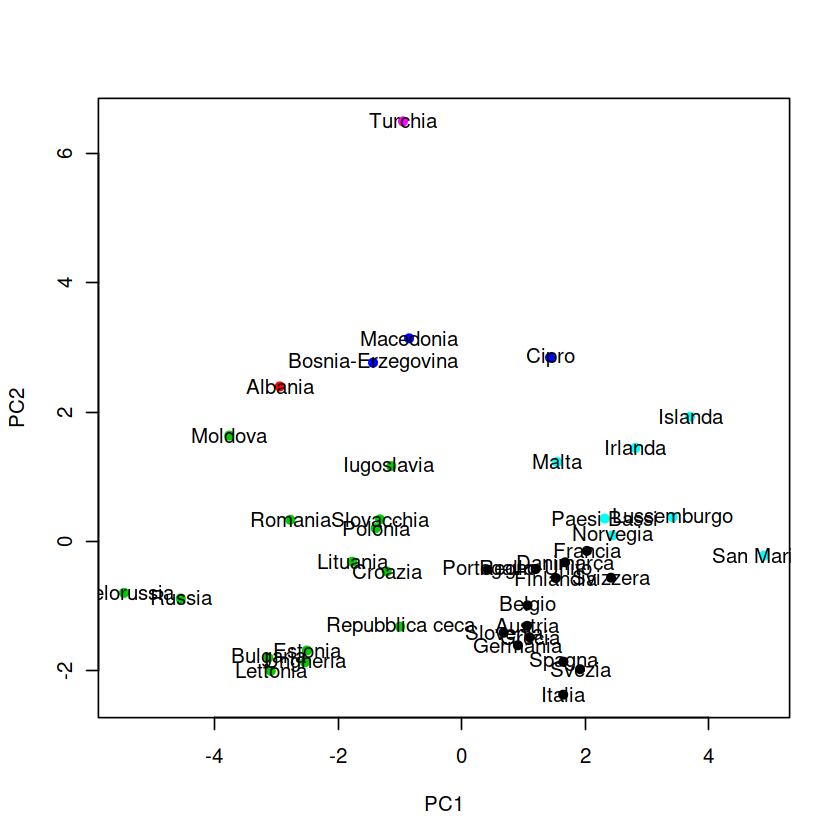

In [148]:
plot(pc, col = km6$cluster, pch=16)
text(pc, labels=rownames(pc))

In [139]:
# prints the sizes of the clusters
km6$size
row.names(x[match(which(km6$size ==1), km6$cluster),])

[1] 14  1 14  3  7  1

[1] "Albania" "Turchia"

In [140]:
km6best <- kmeans(x, 6, 100, 25)

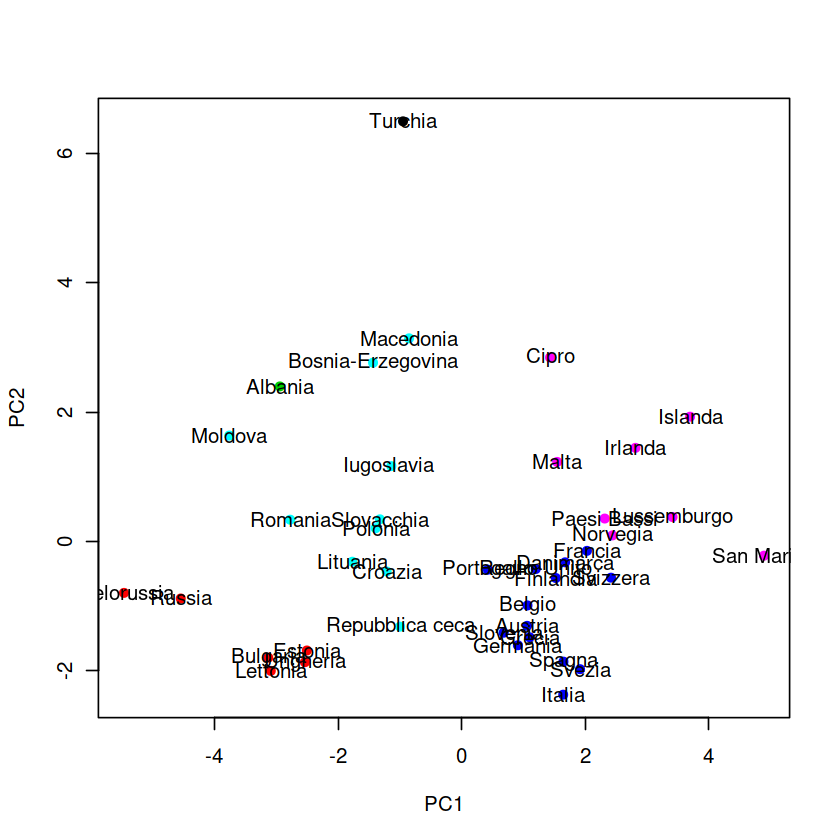

In [149]:
plot(pc, col = km6best$cluster, pch=16)
text(pc, labels=rownames(pc))

In [151]:
km6best$size
row.names(x[match(which(km6best$size ==1), km6best$cluster),])

[1]  1  6  1 14 10  8

[1] "Turchia" "Albania"

In [152]:
# Within deviance is lower for the best configuration
km6$tot.w
km6best$tot.w

[1] 144.0562

[1] 142.8716

In [153]:
lm_cl9 <- cutree(lm, k = 9)
init9 <- aggregate(x, list(lm_cl9), mean)
km9 <- kmeans(x, init9[, -1], 100)

In [154]:
km9$size
row.names(x[match(which(km9$size ==1), km9$cluster),])

[1] 14  6  1  3  3 10  1  1  1

[1] "Albania"    "Cipro"      "San Marino" "Turchia"

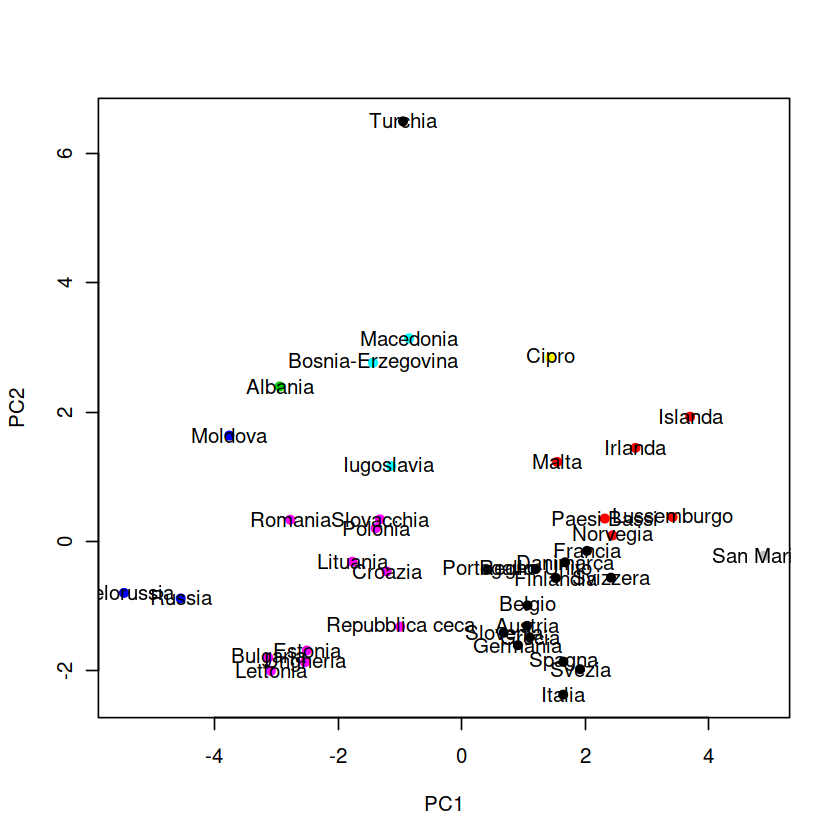

In [155]:
plot(pc, col = km9$cluster, pch=16)
text(pc, labels=rownames(pc))

In [156]:
km9best <- kmeans(x, 9, 100, 25)

In [157]:
km9best$size
row.names(x[match(which(km9best$size ==1), km9best$cluster),])

[1]  1  5  1 10  1  1 11  9  1

[1] "Bielorussia" "Albania"     "Cipro"       "San Marino"  "Turchia"

In [158]:
km9$tot.w
km9best$tot.w

[1] 88.79624

[1] 89.9779

## Cluster Number Selection

In [159]:
kmax <- 30

for (g in 2:kmax) assign(paste0("km", g), kmeans(x, g, 100, 10000))

Warning message in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...):
“graphical parameter "type" is obsolete”

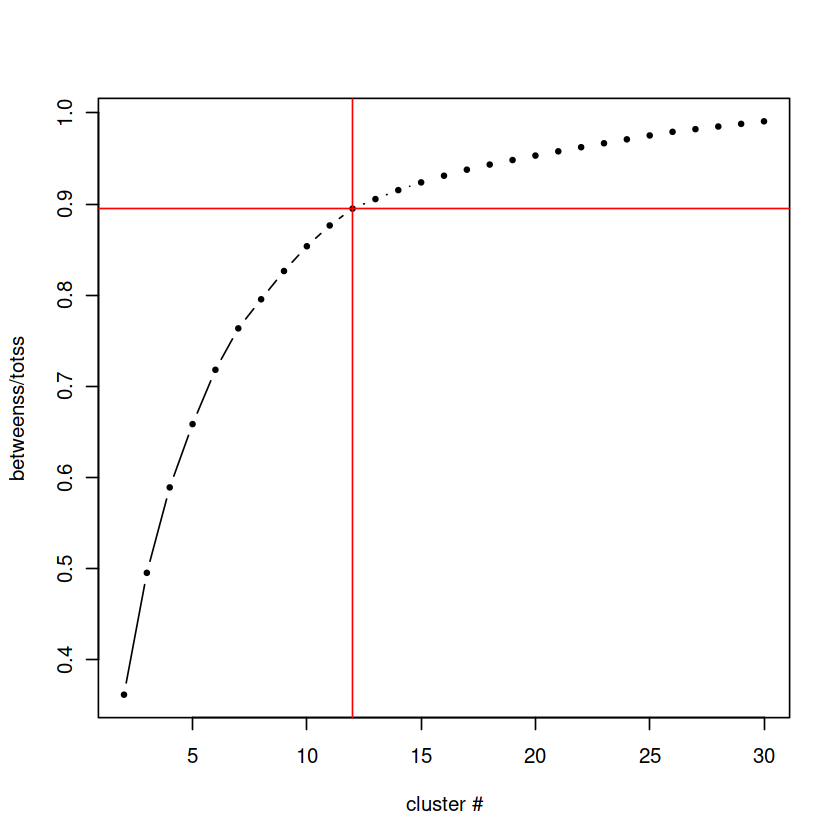

In [174]:
betweenss <- vector(l = kmax - 1)
for (g in 2:kmax) betweenss[g - 1] <- get(paste0("km", g))[["betweenss"]]

totss <- km2$totss

plot(2:kmax, betweenss/totss, type = "b", pch = 20, xlab = "cluster #", cex = 0.65)
abline(h = 0.895, col="red", type="")
abline(v = 12, col="red")

# Since the elbow is at n = 12, we can cut the k to 12.

In [175]:
nc <- NbClust(x, method = "kmeans", index = "kl")
nc

$All.index
      2       3       4       5       6       7       8       9      10      11 
 2.5776  2.4954  0.3920  2.6342  0.8426  1.7706  0.4228 38.5523  0.0425  1.1385 
     12      13      14      15 
 7.1692  0.1656  4.9314  1.7001 

$Best.nc
Number_clusters     Value_Index 
         9.0000         38.5523 

$Best.partition
          Austria            Belgio         Danimarca         Finlandia 
                2                 2                 2                 2 
          Francia          Germania            Grecia           Irlanda 
                2                 2                 2                 5 
           Italia       Lussemburgo       Paesi Bassi        Portogallo 
                2                 5                 5                 2 
      Regno Unito            Spagna            Svezia           Albania 
                2                 2                 2                 4 
      Bielorussia Bosnia-Erzegovina          Bulgaria             Cipro 
                3                 9                 3                 1 
          Croazia           Estonia           Islanda       Iugoslavia  
                6                 3                 5                 9 
         Lettonia          Lituania         Macedonia             Malta 
                3                 6                 9                 5 
          Moldova          Norvegia           Polonia   Repubblica ceca 
                9                 5                 6                 6 
          Romania            Russia        San Marino        Slovacchia 
                6                 3                 8                 6 
         Slovenia          Svizzera           Turchia          Ungheria 
                2                 2                 7                 3